In [ ]:
!unzip /content/data1.zip

Archive:  /content/data1.zip
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/houses_to_rent.csv  
  inflating: __MACOSX/data/._houses_to_rent.csv  
  inflating: data/Advertising.csv    
  inflating: __MACOSX/data/._Advertising.csv  
  inflating: data/breastcancer_test.csv  
  inflating: __MACOSX/data/._breastcancer_test.csv  
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/breastcancer_training.csv  
  inflating: __MACOSX/data/._breastcancer_training.csv  
  inflating: data/Vehicle.csv        
  inflating: __MACOSX/data/._Vehicle.csv  
  inflating: data/concrete_data.csv  
  inflating: __MACOSX/data/._concrete_data.csv  
  inflating: data/iris-with-errors.csv  
  inflating: __MACOSX/data/._iris-with-errors.csv  
  inflating: data/winequality-red.csv  
  inflating: __MACOSX/data/._winequality-red.csv  
  inflating: data/iris.csv           
  inflating: __MACOSX/data/._iris.csv  
  inflating: data/BreastCancer.cs

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
-----------------------------------------------------------------
     Comp  Circ  D.Circ  Rad.Ra  Pr.Axis.Ra  Max.L.Ra  Scat.Ra  Elong  \
0      95

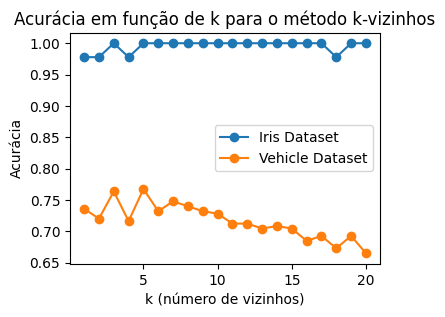

-----------------------------------------------------------------
Iris Dataset: Melhor k = 3, Acurácia = 1.0000
Vehicle Dataset: Melhor k = 5, Acurácia = 0.7677
-----------------------------------------------------------------


In [ ]:
# 1 - Considere as bases Iris e Vehicle.
# Em um mesmo gráfico, mostre a acurácia em função de k para o método k-vizinhos.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Carregar os arquivos CSV
iris_df = pd.read_csv('data/iris.csv')
print(iris_df)
print("-----------------------------------------------------------------")
vehicle_df = pd.read_csv('data/Vehicle.csv')
print(vehicle_df)
print("-----------------------------------------------------------------")

# Preparar os dados
# Para a base Iris
X_iris = iris_df.drop('species', axis=1)
y_iris = iris_df['species']

# Para a base Vehicle
X_vehicle = vehicle_df.drop('Class', axis=1)
y_vehicle = vehicle_df['Class']

# Dividir os dados em treino e teste
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
X_train_vehicle, X_test_vehicle, y_train_vehicle, y_test_vehicle = train_test_split(X_vehicle, y_vehicle, test_size=0.3, random_state=42)

# Escalar os dados
scaler_iris = StandardScaler().fit(X_train_iris)
X_train_iris = scaler_iris.transform(X_train_iris)
X_test_iris = scaler_iris.transform(X_test_iris)

scaler_vehicle = StandardScaler().fit(X_train_vehicle)
X_train_vehicle = scaler_vehicle.transform(X_train_vehicle)
X_test_vehicle = scaler_vehicle.transform(X_test_vehicle)

k_values = range(1, 21)
accuracy_iris = []
accuracy_vehicle = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Iris
    knn.fit(X_train_iris, y_train_iris)
    y_pred_iris = knn.predict(X_test_iris)
    accuracy_iris.append(accuracy_score(y_test_iris, y_pred_iris))

    # Vehicle
    knn.fit(X_train_vehicle, y_train_vehicle)
    y_pred_vehicle = knn.predict(X_test_vehicle)
    accuracy_vehicle.append(accuracy_score(y_test_vehicle, y_pred_vehicle))

# Plotar os resultados
plt.figure(figsize=(4, 3))
plt.plot(k_values, accuracy_iris, marker='o', label='Iris Dataset')
plt.plot(k_values, accuracy_vehicle, marker='o', label='Vehicle Dataset')
plt.xlabel('k (número de vizinhos)')
plt.ylabel('Acurácia')
plt.title('Acurácia em função de k para o método k-vizinhos')
plt.legend()
plt.grid(False)
plt.show()

print("-----------------------------------------------------------------")
# Encontrar o valor de k que deu a maior acurácia para cada dataset
best_k_iris = k_values[np.argmax(accuracy_iris)]
best_accuracy_iris = max(accuracy_iris)
best_k_vehicle = k_values[np.argmax(accuracy_vehicle)]
print(f"Iris Dataset: Melhor k = {best_k_iris}, Acurácia = {best_accuracy_iris:.4f}")
best_accuracy_vehicle = max(accuracy_vehicle)
print(f"Vehicle Dataset: Melhor k = {best_k_vehicle}, Acurácia = {best_accuracy_vehicle:.4f}")
print("-----------------------------------------------------------------")

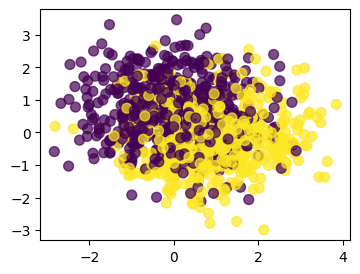

-----------------------------------------------------------------


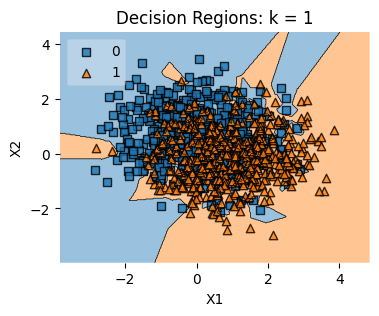

-----------------------------------------------------------------


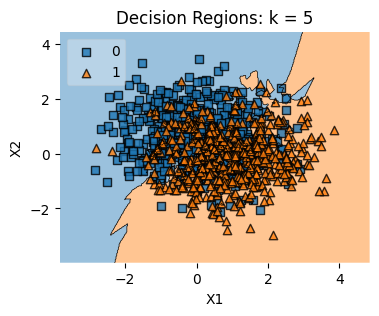

-----------------------------------------------------------------


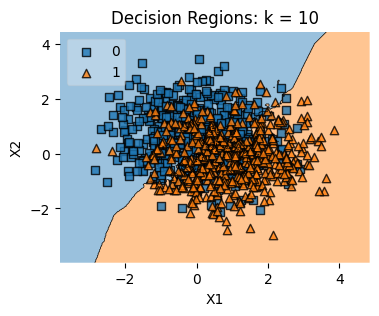

-----------------------------------------------------------------


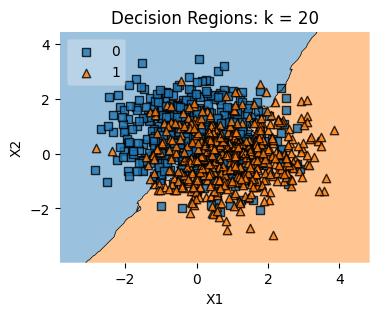

-----------------------------------------------------------------


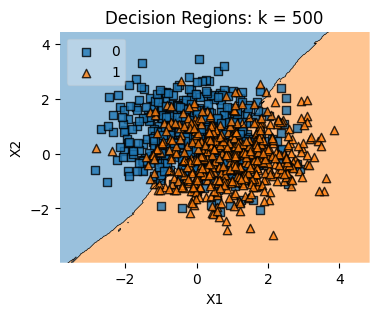

-----------------------------------------------------------------


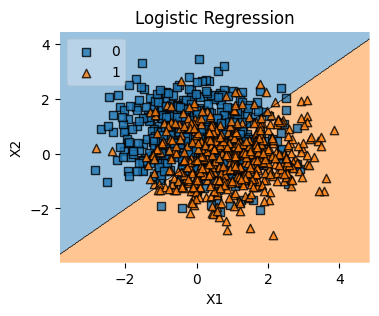

In [ ]:
# 2 – Considere os dados gerados com o código abaixo e obtenha as regiões de separação usando
# o método k-vizinhos para diferentes valores de k. Compare com as regiões obtidas usando o método regressão logística.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Gerar os dados
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.9)
X = data[0]
y = data[1]
plt.figure(figsize=(4,3))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)
print("-----------------------------------------------------------------")

# mostra as regiões de separação para diversos valores de k
vk = [1,5,10,20,int(n_samples/2)]
for k in vk:
    # Training a classifier
    model_KNN = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model_KNN.fit(X, y)
    # Plotting decision regions
    plt.figure(figsize=(4, 3))
    plot_decision_regions(X, y, clf=model_KNN, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Decision Regions: k = {k}')
    plt.show()
    print("-----------------------------------------------------------------")

# Treinar e visualizar com Regressão Logística
model_LR = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model_LR.fit(X, y)
# Plotting decision region
plt.figure(figsize=(4, 3))
plot_decision_regions(X, y, clf=model_LR, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression')
plt.show()

In [121]:
# 3 – Classifique as bases Iris e Vehicle usando regressão logística e compare com o método k-vizinhos

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar a base de dados Vehicle
print("Vehicle Dataset")
df = pd.read_csv('data/Vehicle.csv')
print(df.iloc[:, -1].value_counts())
print("-----------------------------------------------------------------------")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regressão Logística
log_reg = LogisticRegression(max_iter=200)

# Definir a grade de parâmetros para otimização
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parâmetro de regularização
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Solvers para o algoritmo
    'penalty': ['l2'],  # Tipo de regularização
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ajustar o GridSearchCV aos dados de treino
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
print("Regressão Logística -- Vehicle")
print("-----------------------------------------------------------------------")
print(" Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("-----------------------------------------------------------------------")

# Obter o melhor modelo
best_log_reg = grid_search.best_estimator_

# Fazer previsões com o melhor modelo
y_pred_log_reg = best_log_reg.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred_log_reg))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_log_reg))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_log_reg))
print("-----------------------------------------------------------------------")

# k-NN
knn = KNeighborsClassifier()

# Definir a grade de parâmetros para otimização
param_grid = {
    'n_neighbors': [1, 3, 5, 10, 20],  # Número de vizinhos
    'weights': ['uniform', 'distance'],  # Método de ponderação
    'metric': ['euclidean'],  # Métrica de distância
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ajustar o GridSearchCV aos dados de treino
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
print("kNN -- Vehicle")
print("-----------------------------------------------------------------------")
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("-----------------------------------------------------------------------")

# Obter o melhor modelo
best_knn = grid_search.best_estimator_

# Fazer previsões com o melhor modelo
y_pred_knn = best_knn.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_knn))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_knn))
print("-----------------------------------------------------------------------")

Vehicle Dataset
Class
bus     218
saab    217
opel    212
van     199
Name: count, dtype: int64
-----------------------------------------------------------------------
Regressão Logística -- Vehicle
-----------------------------------------------------------------------
 Melhores parâmetros encontrados:
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
-----------------------------------------------------------------------
Acurácia: 0.8464566929133859
Relatório de Classificação:
               precision    recall  f1-score   support

         bus       0.98      0.95      0.97        65
        opel       0.74      0.67      0.70        64
        saab       0.73      0.80      0.76        65
         van       0.94      0.97      0.95        60

    accuracy                           0.85       254
   macro avg       0.85      0.85      0.85       254
weighted avg       0.85      0.85      0.85       254

Matriz de Confusão:
 [[62  1  1  1]
 [ 1 43 17  3]
 [ 0 13 52  0]
 [ 0  1  1 58]

In [124]:
# 3 – Classifique as bases Iris e Vehicle usando regressão logística e compare com o método k-vizinhos

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar a base de dados Vehicle
print("Iris Dataset")
df = pd.read_csv('data/iris.csv')
print(df.iloc[:, -1].value_counts())
print("-----------------------------------------------------------------------")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regressão Logística
log_reg = LogisticRegression(max_iter=200)

# Definir a grade de parâmetros para otimização
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parâmetro de regularização
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Solvers para o algoritmo
    'penalty': ['l2'],  # Tipo de regularização
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ajustar o GridSearchCV aos dados de treino
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
print("Regressão Logística -- Iris")
print("-----------------------------------------------------------------------")
print(" Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("-----------------------------------------------------------------------")

# Obter o melhor modelo
best_log_reg = grid_search.best_estimator_

# Fazer previsões com o melhor modelo
y_pred_log_reg = best_log_reg.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred_log_reg))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_log_reg))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_log_reg))
print("-----------------------------------------------------------------------")

# k-NN
knn = KNeighborsClassifier()

# Definir a grade de parâmetros para otimização
param_grid = {
    'n_neighbors': [1, 3, 5, 10, 20],  # Número de vizinhos
    'weights': ['uniform', 'distance'],  # Método de ponderação
    'metric': ['euclidean'],  # Métrica de distância
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ajustar o GridSearchCV aos dados de treino
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
print("kNN -- Iris")
print("-----------------------------------------------------------------------")
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("-----------------------------------------------------------------------")

# Obter o melhor modelo
best_knn = grid_search.best_estimator_

# Fazer previsões com o melhor modelo
y_pred_knn = best_knn.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_knn))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_knn))
print("-----------------------------------------------------------------------")

Iris Dataset
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
-----------------------------------------------------------------------
Regressão Logística -- Iris
-----------------------------------------------------------------------
 Melhores parâmetros encontrados:
{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
-----------------------------------------------------------------------
Acurácia: 0.9111111111111111
Relatório de Classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Matriz de Confusão:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
-----------------------------------------------------------------------
kNN --